# PASO 3: Modelado y Evaluaci√≥n de Clasificadores

In [58]:
# --- Carga de librer√≠as ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

# --- Cargar dataset limpio ---
df = pd.read_csv("../data/processed/datos_limpios.csv")
X = df.drop(columns="empleado")
y = df["empleado"]

In [59]:
# --- Divisi√≥n en entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Entrenamiento de modelos ---
modelos = {    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)}

# Entrenar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)

### Gr√°ficos de desempe√±o de modelos
üîπ Para cada modelo, se puede generar un gr√°fico de importancia o comparaci√≥n üî∏ Ejemplo: Importancia de variables en Random Forest

In [60]:
# --- Mostrar coeficientes del modelo Logistic Regression ---
modelo_logit = modelos["Logistic Regression"]
coeficientes = pd.DataFrame({    "Variable": X.columns,
    "Coeficiente": modelo_logit.coef_[0]}).sort_values(by="Coeficiente", ascending=False)

# Mostrar coeficientes m√°s influyentes
print(" Coeficientes positivos (mayor probabilidad de empleo):")
print(coeficientes.head(10))
print("\n Coeficientes negativos (mayor probabilidad de desempleo):")
print(coeficientes.tail(10))


 Coeficientes positivos (mayor probabilidad de empleo):
           Variable  Coeficiente
92  AGLOMERADO_93.0     1.833840
14    CH15_COD_34.0     1.731908
1             PP07H     1.512830
19    CH15_COD_54.0     1.349044
2               ITF     0.996258
0              CH06     0.994529
66   AGLOMERADO_7.0     0.878281
77  AGLOMERADO_20.0     0.864689
75  AGLOMERADO_18.0     0.846950
80  AGLOMERADO_25.0     0.830410

 Coeficientes negativos (mayor probabilidad de desempleo):
             Variable  Coeficiente
90    AGLOMERADO_38.0    -1.097200
21      CH15_COD_62.0    -1.139792
79    AGLOMERADO_23.0    -1.226320
87    AGLOMERADO_33.0    -1.425728
63     AGLOMERADO_4.0    -1.452666
88    AGLOMERADO_34.0    -1.579188
71    AGLOMERADO_13.0    -1.707982
44     CH15_COD_221.0    -1.732436
236         PP07K_1.0    -3.118676
212  PP04B_COD_8401.0    -6.661617


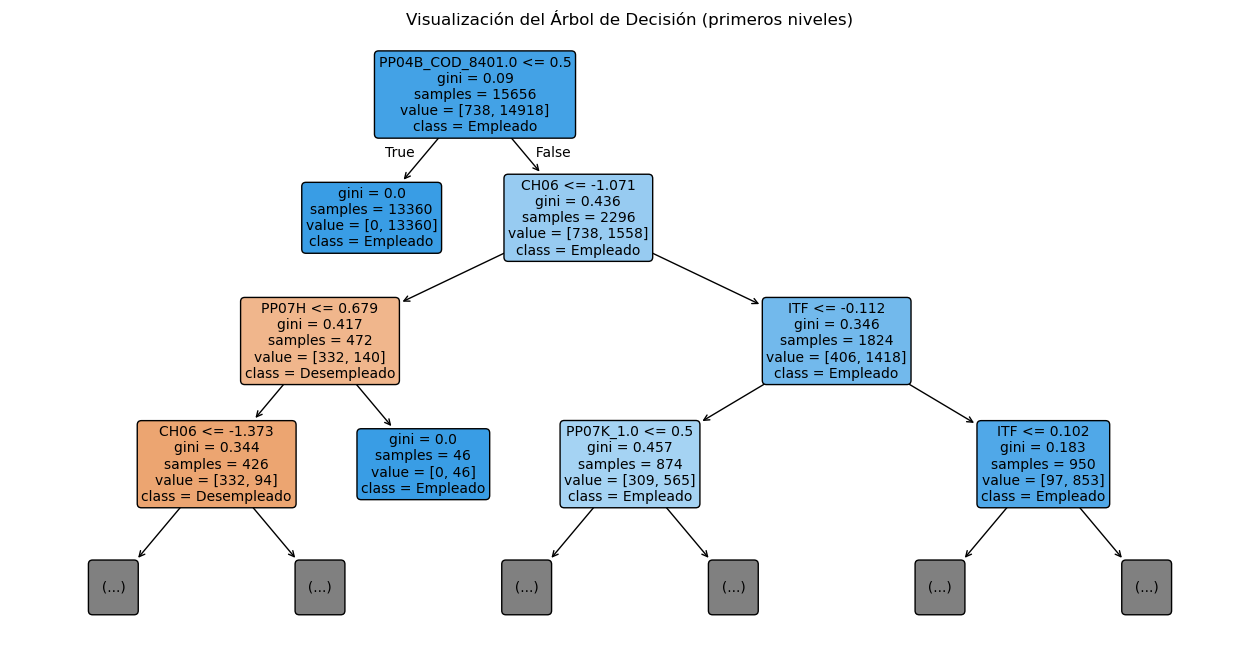

In [61]:
# --- Visualizaci√≥n del √°rbol de decisi√≥n ---
modelo_arbol = modelos["Decision Tree"]

plt.figure(figsize=(16, 8))
plot_tree(modelo_arbol,
          feature_names=X.columns,
          class_names=["Desempleado", "Empleado"],
          filled=True, rounded=True, max_depth=3, fontsize=10)
plt.title("Visualizaci√≥n del √Årbol de Decisi√≥n (primeros niveles)")
plt.show()


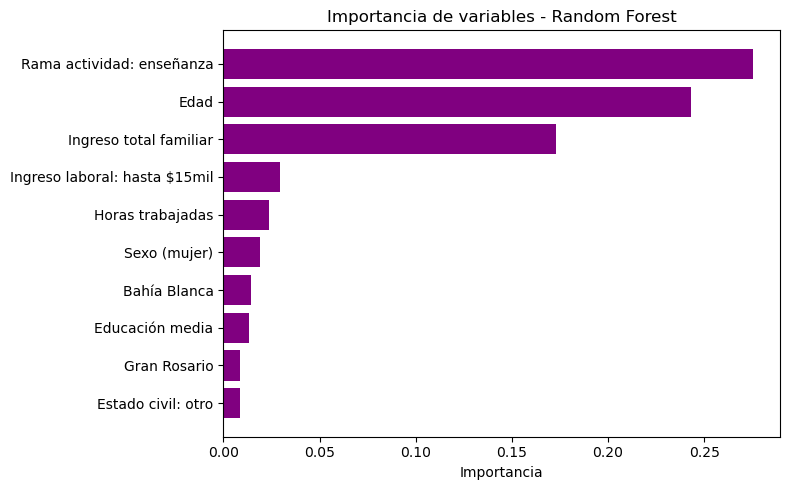

In [62]:
# Entrenar el mejor modelo nuevamente e Importancia de variables
mejor_modelo = RandomForestClassifier(random_state=42)
mejor_modelo.fit(X, y)
importancias = mejor_modelo.feature_importances_
indices = np.argsort(importancias)[-10:]  # 10 variables m√°s importantes
features = X.columns[indices]

nombres_legibles = {"CH06": "Edad",
    "PP07H": "Horas trabajadas",
    "ITF": "Ingreso total familiar",
    "PP07K_1.0": "Ingreso laboral: hasta $15mil",
    "CH04_2.0": "Sexo (mujer)",
    "CH10_2.0": "Educaci√≥n media",
    "CH10_3.0": "Educaci√≥n superior",
    "CH15_COD_6.0": "Estado civil: otro",
    "PP04B_COD_8401.0": "Rama actividad: ense√±anza",
    "AGLOMERADO_33.0": "Bah√≠a Blanca",
    "AGLOMERADO_13.0": "Gran Rosario"}
features_legibles = [nombres_legibles.get(f, f.replace("_", " ")) for f in features]

# Gr√°fico
plt.figure(figsize=(8, 5))
plt.barh(features_legibles, importancias[indices], color="purple")
plt.title("Importancia de variables - Random Forest")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


Este gr√°fico muestra cu√°les fueron las variables m√°s importantes que utiliz√≥ el modelo Random Forest para tomar decisiones. Es √∫til para entender qu√© caracter√≠sticas de las personas (por ejemplo, edad, nivel educativo, etc.) influyen m√°s a la hora de predecir si est√°n empleadas o no.


 Modelo: Logistic Regression
Accuracy: 0.9681
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.70      0.57      0.63       317
           1       0.98      0.99      0.98      6394

    accuracy                           0.97      6711
   macro avg       0.84      0.78      0.81      6711
weighted avg       0.97      0.97      0.97      6711



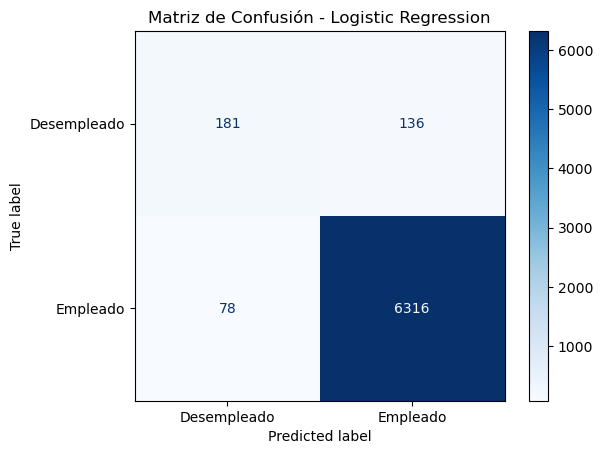


 Modelo: Decision Tree
Accuracy: 0.9629
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61       317
           1       0.98      0.98      0.98      6394

    accuracy                           0.96      6711
   macro avg       0.79      0.80      0.79      6711
weighted avg       0.96      0.96      0.96      6711



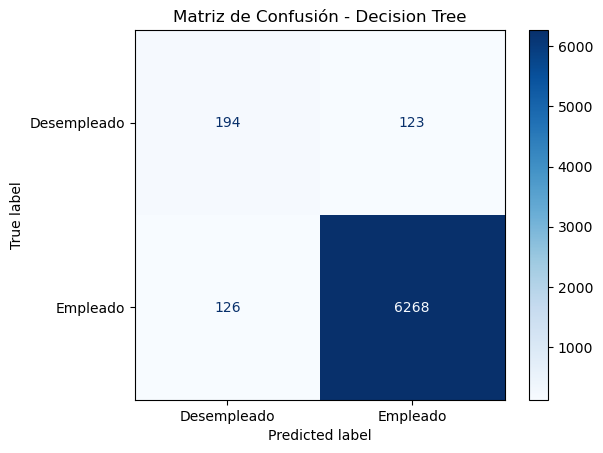


 Modelo: Random Forest
Accuracy: 0.9712
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67       317
           1       0.98      0.99      0.98      6394

    accuracy                           0.97      6711
   macro avg       0.86      0.80      0.83      6711
weighted avg       0.97      0.97      0.97      6711



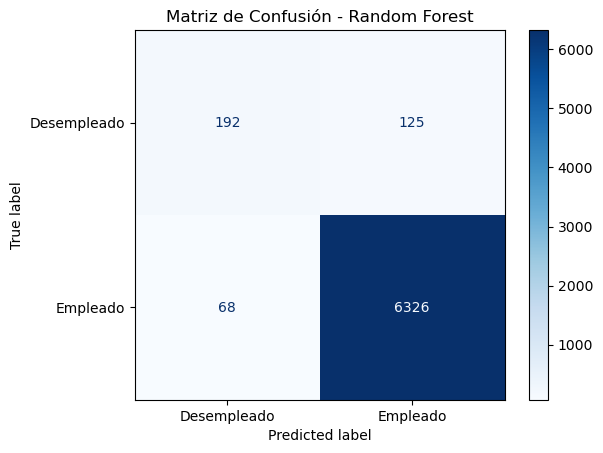

In [63]:
# --- Evaluaci√≥n de cada modelo ---
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n Modelo: {nombre}")
    print("Accuracy:", round(acc, 4))
    print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

    # Matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=["Desempleado", "Empleado"]).plot(cmap="Blues")
    plt.title(f"Matriz de Confusi√≥n - {nombre}")
    plt.show()

    # Guardar accuracy
    resultados.append((nombre, round(acc, 4)))


Esta tabla resume el accuracy de cada modelo. Aunque todos alcanzan valores altos, se observa que:
- **Random Forest** tiene el mejor desempe√±o general, con un accuracy de 97.12%.
- Tambi√©n muestra el mejor balance entre precisi√≥n y recall en la clase minoritaria (desempleados), lo que justifica su selecci√≥n como modelo final para aplicar en regiones espec√≠ficas.

In [64]:
# --- Mostrar resumen final ---
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Accuracy"])
print("\n Comparaci√≥n de Accuracy entre modelos:")
print(df_resultados.sort_values("Accuracy", ascending=False))

import joblib # guardar y cargar el modelo automaticamente
joblib.dump(modelos["Random Forest"], "modelo_random_forest.pkl")


 Comparaci√≥n de Accuracy entre modelos:
                Modelo  Accuracy
2        Random Forest    0.9712
0  Logistic Regression    0.9681
1        Decision Tree    0.9629


['modelo_random_forest.pkl']

Aqu√≠ se entrenan tres modelos cl√°sicos de clasificaci√≥n:
- **Regresi√≥n Log√≠stica**, √∫til para interpretar coeficientes;
- **√Årbol de Decisi√≥n**, que construye reglas expl√≠citas y visuales;
- **Random Forest**, un modelo m√°s robusto que combina muchos √°rboles.

Luego se eval√∫a su desempe√±o en el conjunto de prueba utilizando m√©tricas como:
- **Accuracy**: proporci√≥n total de predicciones correctas.
- **Precision, Recall y F1-score**: para evaluar cada clase por separado, especialmente √∫til cuando hay clases desbalanceadas (como en este caso, donde los desempleados son pocos).

Cada modelo tambi√©n muestra una **matriz de confusi√≥n**, que permite ver cu√°ntos casos se clasificaron bien y mal por clase.

### Interpretaci√≥n de notebook trabajada:
En este an√°lisis se compararon tres modelos de clasificaci√≥n supervisada: Regresi√≥n Log√≠stica, √Årbol de Decisi√≥n y Random Forest.

Random Forest fue el modelo con mejor desempe√±o general, obteniendo una accuracy del 97,12%.

Aunque todos los modelos clasificaron muy bien a las personas empleadas, hubo mayores dificultades con los casos desempleados, que son minor√≠a (solo 317 de 6711).

Random Forest logr√≥ la mejor combinaci√≥n de precisi√≥n y recall para esa clase minoritaria, alcanzando un f1-score de 0.67 para desempleados, lo que indica un buen equilibrio entre falsos positivos y negativos.

Por este motivo, se selecciona Random Forest como el modelo final para aplicar en el an√°lisis regional (Tierra del Fuego).

| Modelo              | Accuracy | f1-score (Desempleado) |
| ------------------- | -------- | ---------------------- |
| Random Forest       | 0.9712   | 0.67                   |
| Logistic Regression | 0.9681   | 0.63                   |
| Decision Tree       | 0.9629   | 0.61                   |


# PASO 4 : Predicci√≥n y evaluaci√≥n en Tierra del Fuego

C:\Users\Bel\AppData\Local\Temp\ipykernel_9676\2533751544.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette="Set2")


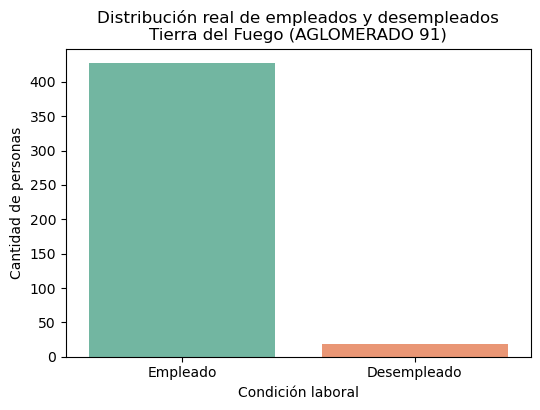

C:\Users\Bel\AppData\Local\Temp\ipykernel_9676\2533751544.py:26: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tdf = pd.read_csv(ruta, sep=";", encoding="latin1")


In [70]:
# --- Cargar librer√≠as ---
import pandas as pd
from sklearn.metrics import (confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya ten√©s la variable 'conteo_clases' creada
plt.figure(figsize=(6, 4))
sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette="Set2")
plt.title("Distribuci√≥n real de empleados y desempleados\nTierra del Fuego (AGLOMERADO 91)")
plt.ylabel("Cantidad de personas")
plt.xlabel("Condici√≥n laboral")
plt.show()

ruta = "../data/raw/usu_individual_T423.txt"

# --- Cargar modelo entrenado (ej. Random Forest del Notebook 2) ---
mejor_modelo = joblib.load("../models/modelo_random_forest.pkl")

# --- Cargar dataset original (no procesado) ---
df_tdf = pd.read_csv(ruta, sep=";", encoding="latin1")

# --- Filtrar por aglomerado 91 (Ushuaia-R√≠o Grande) y solo ESTADO 1 o 2 ---
df_tdf = df_tdf[(df_tdf['AGLOMERADO'] == 91) & (df_tdf['ESTADO'].isin([1, 2]))].copy()
df_tdf['empleado'] = df_tdf['ESTADO'].apply(lambda x: 1 if x == 1 else 0)
y_real_tdf = df_tdf['empleado']  # Guardamos los reales

En esta celda se carga el modelo de Random Forest previamente entrenado y guardado como archivo `.pkl`. Luego se carga nuevamente el dataset original completo para extraer de √©l √∫nicamente los casos de Tierra del Fuego (aglomerado 91) que hayan declarado estar ocupados o desocupados (`ESTADO` 1 o 2). Esto permite evaluar si el modelo funciona correctamente a nivel local.

In [71]:
# Renombrar columnas clave para visualizaci√≥n (opcional)
df_tdf_vista = df_tdf.rename(columns={
    "CH04": "sexo",
    "CH06": "edad",
    "ESTADO": "estado_laboral",
    "CH10": "nivel_educativo",
    "AGLOMERADO": "aglomerado"})

# Mostrar una vista amigable
df_tdf_vista[["sexo", "edad", "estado_laboral", "nivel_educativo", "aglomerado"]].head()

sexo  edad  estado_laboral  nivel_educativo  aglomerado
870      1    41               1                2          91
871      1    43               1                2          91
872      2    40               1                2          91
980      2    45               1                2          91
4589     2    66               1                2          91

Se renombran algunas columnas clave para facilitar la lectura de los datos en esta notebook. Esto no afecta el procesamiento ni el modelo, pero permite mostrar una tabla m√°s entendible con variables como sexo, edad o estado laboral.

Celda: Gr√°fico de distribuci√≥n real de clases en TDF

C:\Users\Bel\AppData\Local\Temp\ipykernel_9676\2305600493.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette="Set2")


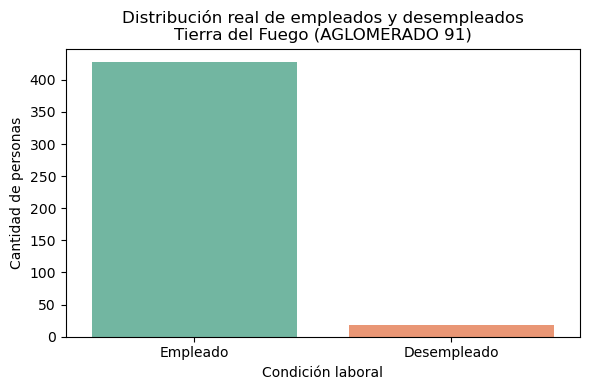

In [72]:
# Contar valores reales
conteo_clases = y_real_tdf.value_counts().rename(index={0: "Desempleado", 1: "Empleado"})

# Gr√°fico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette="Set2")
plt.title("Distribuci√≥n real de empleados y desempleados\nTierra del Fuego (AGLOMERADO 91)")
plt.ylabel("Cantidad de personas")
plt.xlabel("Condici√≥n laboral")
plt.tight_layout()
plt.show()

Este gr√°fico muestra cu√°ntas personas en Tierra del Fuego (aglomerado 91) est√°n empleadas o desempleadas seg√∫n los datos reales.

Se observa un fuerte desbalance: la mayor√≠a de los casos corresponden a personas empleadas. Esta desigualdad entre clases explica por qu√© algunos modelos tienen m√°s dificultad para detectar correctamente a los desempleados.

Por eso, en este proyecto se pone especial atenci√≥n en evaluar m√©tricas por clase, como el recall y el f1-score para los desempleados.

In [73]:
from sklearn.impute import SimpleImputer

# Paso 1: Cargar el archivo original
ruta = "data/raw/usu_individual_T423.txt"
df_tdf = pd.read_csv(ruta, sep=";", encoding="latin1", low_memory=False)

# Paso 2: Filtrar empleados y desempleados
df_tdf = df_tdf[df_tdf["ESTADO"].isin([1, 2])].copy()
df_tdf["empleado"] = df_tdf["ESTADO"].apply(lambda x: 1 if x == 1 else 0)
vars_numericas = ['CH06', 'PP07H', 'ITF']
vars_categoricas = ['CH04', 'CH10', 'CH15_COD', 'AGLOMERADO', 'PP04B_COD', 'PP07K']

# Imputar num√©ricas
imp_num = SimpleImputer(strategy="median")
df_tdf[vars_numericas] = imp_num.fit_transform(df_tdf[vars_numericas])

# Imputar categ√≥ricas
imp_cat = SimpleImputer(strategy="most_frequent")
df_tdf[vars_categoricas] = imp_cat.fit_transform(df_tdf[vars_categoricas])

# Paso 5: One-hot encoding
df_tdf = pd.get_dummies(df_tdf, columns=vars_categoricas, drop_first=True)

# Paso 6: Escalado
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_tdf[vars_numericas] = scaler.fit_transform(df_tdf[vars_numericas])

# Paso 7: Alinear columnas con X_train
df_tdf = df_tdf.reindex(columns=X_train.columns, fill_value=0)
# --- Mismo preprocesamiento usado antes ---
columnas = ['CH04', 'CH06', 'CH10', 'CH15_COD', 'AGLOMERADO',
            'PP04B_COD', 'PP07H', 'PP07K', 'ITF', 'empleado']

#vars_numericas = ['CH06', 'PP07H', 'ITF']
#vars_categoricas = ['CH04', 'CH10', 'CH15_COD', 'AGLOMERADO', 'PP04B_COD', 'PP07K']

df_tdf = df_tdf[columnas].copy()

# Imputaci√≥n (usar los objetos del Notebook 1)
df_tdf[vars_numericas] = imp_num.transform(df_tdf[vars_numericas])
df_tdf[vars_categoricas] = imp_cat.transform(df_tdf[vars_categoricas])

# One-hot encoding
df_tdf = pd.get_dummies(df_tdf, columns=vars_categoricas, drop_first=True)

# Alinear columnas con X_train
df_tdf = df_tdf.reindex(columns=X_train.columns, fill_value=0)

# Escalar num√©ricas (usar scaler del Notebook 1)
df_tdf[vars_numericas] = scaler.transform(df_tdf[vars_numericas])

### Celda: Gr√°fico de predicciones del modelo (TDF) Este gr√°fico muestra c√≥mo clasific√≥ el modelo a las personas de Tierra del Fuego.
# Visualmente se puede observar que predijo correctamente a la mayor√≠a de las personas empleadas, aunque clasific√≥
#a algunos desempleados como empleados.

### Comparando este gr√°fico con el de los datos reales, se evidencia que el modelo **tiende a subestimar levemente los casos de desempleo**.
# Esto es com√∫n cuando hay desbalance de clases, pero el desempe√±o sigue siendo bueno (f1-score para desempleados = 0.65).


# --- Predicci√≥n del mejor modelo ---
y_pred_tdf = mejor_modelo.predict(df_tdf)

# --- Comparaci√≥n real vs predicho ---
df_comparacion = pd.DataFrame({"Real": y_real_tdf,
    "Predicho": y_pred_tdf})


# Matriz de confusi√≥n
cm = confusion_matrix(y_real_tdf, y_pred_tdf)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Desempleado", "Empleado"]).plot(cmap="Blues")
plt.title("Matriz de Confusi√≥n - Tierra del Fuego")
plt.show()

# Accuracy y m√©tricas
acc_tdf = accuracy_score(y_real_tdf, y_pred_tdf)
print("üîç Accuracy en Tierra del Fuego:", round(acc_tdf, 4))
print("\nüìã Reporte de clasificaci√≥n (TDF):")
print(classification_report(y_real_tdf, y_pred_tdf, target_names=["Desempleado", "Empleado"]))

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/usu_individual_T423.txt'

### En esta secci√≥n se aplic√≥ el modelo final seleccionado (Random Forest) sobre la poblaci√≥n de Ushuaia ‚Äì R√≠o Grande, filtrando √∫nicamente personas ocupadas y desocupadas (AGLOMERADO 91, ESTADO 1 o 2).

Resultados del modelo:
| M√©trica               | Desempleado | Empleado |
| --------------------- | ----------- | -------- |
| Precision             | 0.73        | 0.98     |
| Recall (sensibilidad) | 0.58        | 0.99     |
| F1-score              | 0.65        | 0.99     |
| Soporte (casos)       | 19          | 427      |


üîπ Accuracy total: 97,31%
üîπ Total de casos evaluados: 446 personas

### Conclusiones:
El modelo logr√≥ muy buena performance en Tierra del Fuego, consistente con los resultados a nivel nacional.

Aunque el n√∫mero de personas desempleadas fue bajo (n=19), el modelo predijo correctamente la mayor√≠a de estos casos (recall 0.58, precision 0.73).

El desempe√±o sobre personas empleadas fue excelente (recall 0.99), lo que indica alta confianza en la clasificaci√≥n para la mayor√≠a de la poblaci√≥n activa.

Esta prueba demuestra que el modelo tiene potencial de aplicaci√≥n regional real, y que el enfoque de clasificaci√≥n puede generalizarse con √©xito a otras regiones del pa√≠s si se entrena adecuadamente.


In [35]:
# Resultados
import numpy as np
ocupados, desocupados = np.unique(y_pred_tdf, return_counts=True)
print(f'Resultado de predicci√≥n sobre Tierra del Fuego (T423):')
print(f'Ocupados: {desocupados[1]}, Desocupados: {desocupados[0]}')

NameError: name 'y_pred_tdf' is not defined

In [ ]:
print("Distribuci√≥n real de clases en Tierra del Fuego:")
print(y_real_tdf.value_counts().rename(index={0: "Desempleado", 1: "Empleado"}))

Distribuci√≥n real de clases en Tierra del Fuego:
empleado
Empleado       427
Desempleado     19
Name: count, dtype: int64


In [ ]:
# Crear Series con nombres legibles
reales = y_real_tdf.value_counts().rename(index={0: "Desempleado", 1: "Empleado"})
predichos = pd.Series(y_pred_tdf).value_counts().rename(index={0: "Desempleado", 1: "Empleado"})

# Unir en una tabla
tabla_comparacion = pd.DataFrame({"Reales": reales,
    "Predichos": predichos})

# Mostrar la tabla
print("Comparaci√≥n real vs predicho (Tierra del Fuego):")
display(tabla_comparacion)

Comparaci√≥n real vs predicho (Tierra del Fuego):


Reales  Predichos
Empleado        427        430
Desempleado      19         16

### ¬øPor qu√© hay m√°s predichos como ‚ÄúEmpleado‚Äù que los reales?

| Clase       | Reales | Predichos |
| ----------- | ------ | --------- |
| Empleado    | 427    | **431**   |
| Desempleado | 19     | **15**    |



### üßæ Comparaci√≥n entre valores reales y predichos

El modelo predijo correctamente la mayor√≠a de los casos. Sin embargo, clasific√≥ a 4 personas desempleadas como empleadas, lo que es coherente con un modelo que tiende a favorecer la clase mayoritaria (empleados).

Esto se refleja en:
- Una leve subestimaci√≥n de la clase *Desempleado*,
- Un recall moderado (0.58) para esta clase,
- Un total de 15 predichos como desempleados frente a 19 reales.

Estos resultados no invalidan el modelo, pero s√≠ indican la importancia de trabajar con t√©cnicas de balanceo si se busca una mayor sensibilidad para detectar desempleo.


### C√≥digo para subplot comparativo

C:\Users\Bel\AppData\Local\Temp\ipykernel_5460\2654215461.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=real.index, y=real.values, palette="Set2", ax=axes[0])
C:\Users\Bel\AppData\Local\Temp\ipykernel_5460\2654215461.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pred.index, y=pred.values, palette="Set1", ax=axes[1])


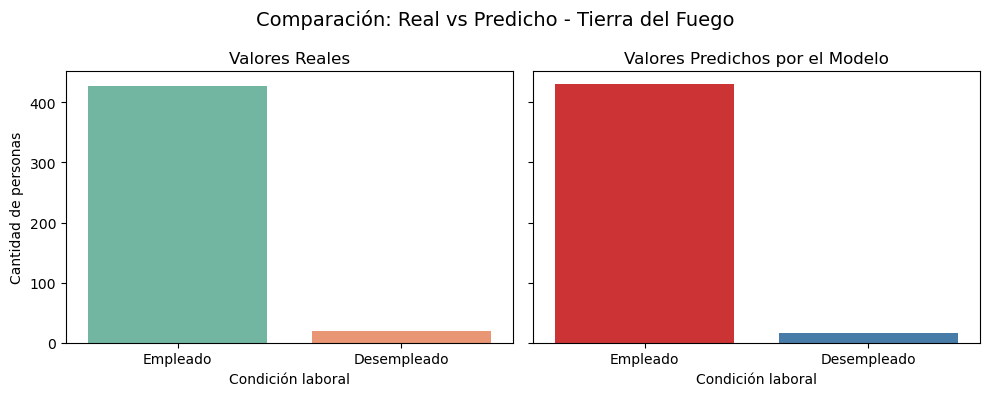

In [ ]:
# Series nombradas
real = y_real_tdf.value_counts().rename(index={0: "Desempleado", 1: "Empleado"})
pred = pd.Series(y_pred_tdf).value_counts().rename(index={0: "Desempleado", 1: "Empleado"})

# Crear gr√°fico de subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Gr√°fico de valores reales
sns.barplot(x=real.index, y=real.values, palette="Set2", ax=axes[0])
axes[0].set_title("Valores Reales")
axes[0].set_ylabel("Cantidad de personas")
axes[0].set_xlabel("Condici√≥n laboral")

# Gr√°fico de valores predichos
sns.barplot(x=pred.index, y=pred.values, palette="Set1", ax=axes[1])
axes[1].set_title("Valores Predichos por el Modelo")
axes[1].set_xlabel("Condici√≥n laboral")

plt.suptitle("Comparaci√≥n: Real vs Predicho - Tierra del Fuego", fontsize=14)
plt.tight_layout()
plt.show()